In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import warnings
warnings.filterwarnings('ignore')

# Data Description
### The data is distributed in two formats, WFDB (WaveForm DataBase) and CSV (comma-separated-value). The WFDB data for all participants have been placed in the root directory along with a corresponding RECORDS file. Each WFDB .hea header file contains the participants' numerics such as \<weight>. .atr annotation files contain automatically detected and manually verified R peak ECG annotations for all records. Record, header and annotation file names incorporated subject and activity following this structure:

sXX_YYYY<br/>
s = subject<br/>
XX = subject number (1-22)<br/>
YYY = activity (sit, walk, run)<br/>
    
### The data is also provided in CSV format in the \CSV folder. All CSV records include a “time” column that was date shifted to de-indentify participants. The \CSV folder also contains the file subjects_info.csv, describing the participants' numerics such as \<weight>.

### Both WFDB and CSV records contain the following channels:

ecg: 3-lead ECG captured at 500Hz<br/>
peaks: CSV ONLY, annotated in WFDB. The annotated ECG R peak (1 = peak, 0 = no peak)<br/>
pleth_1: MAX30101 red wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
pleth_2: MAX30101 infrared wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
pleth_3: MAX30101 green wavelength PPG from the distal phalanx (first segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
pleth_4: MAX30101 red wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
pleth_5: MAX30101 infrared wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
pleth_6: MAX30101 green wavelength PPG from the proximal phalanx (base segment) of the left index finger palmar side (arbitrary units, 500Hz)<br/>
lc_1: TAL221 load cell proximal phalanx (first segment) PPG sensor attachment pressure (arbitrary units, 80Hz)<br/>
lc_2: TAL221 load cell (base segment) PPG sensor attachment pressure (arbitrary units, 80Hz)<br/>
temp_1: distal phalanx (first segment) PPG sensor temperature (°C, 10Hz)<br/>
temp_2: proximal phalanx (base segment) PPG sensor temperature in (°C, 10Hz)<br/>
temp_3: InvenSenseMPU-9250 IMU temperature (°C, 500Hz)<br/>
a_x: InvenSenseMPU-9250 IMU acceleration in x-direction (g, 500Hz)<br/>
a_y: InvenSenseMPU-9250 IMU acceleration in y-direction (g, 500Hz)<br/>
a_z: InvenSenseMPU-9250 IMU acceleration in z-direction (g, 500Hz)<br/>
g_x: InvenSenseMPU-9250 IMU angular velocity around x-axis (°/s, 500Hz)<br/>
g_y: InvenSenseMPU-9250 IMU angular velocity around y-axis (°/s, 500Hz)<br/>
g_z: InvenSenseMPU-9250 IMU angular velocity around z-axis (°/s, 500Hz)<br/>

### Each CSV record includes a time column that was date shifted to de-indentify participants. All WFDB header files or subjects_info.csv contain the following information for each participant:

\<filename>: record filename<br/>
\<activity>: sit, walk or run<br/>
\<gender>: male or female<br/>
\<height>: in increments of 5 (cm)<br/>
\<weight>: in increments of 5 (kg)<br/>
\<age>: in increments of 5 (years)<br/>
\<filename>: record filename<br/>
\<activity>: sit, walk or run<br/>
\<gender>: male or female<br/>
\<height>: in increments of 5 (cm)<br/>
\<weight>: in increments of 5 (kg)<br/>
\<age>: in increments of 5 (years)<br/>
\<bp_sys_start>: systolic blood pressure at the start of the measurement (mmHg)<br/>
\<bp_sys_end>: systolic blood pressure at the end of the measurement (mmHg)<br/>
\<bp_dia_start>: diastolic blood pressure at the start of the measurement (mmHg)<br/>
\<bp_dia_end>: diastolic blood pressure at the end of the measurement (mmHg)<br/>
\<hr_1_start>: heart rate as measured with the OMRON HEM-7322 blood pressure monitor at the start of the measurement (bpm)<br/>
\<hr_2_start>: heart rate as measured with the iHealth Air Wireless Pulse Oximeter at the start of the measurement (bpm)<br/>
\<hr_1_end>: heart rate as measured with the OMRON HEM-7322 blood pressure monitor at the end of the measurement (bpm)<br/>
\<hr_2_end>: heart rate as measured with the iHealth Air Wireless Pulse Oximeter at the end of the measurement (bpm)<br/>
\<spo2_start>: SpO2 at the start of the measurement (%)<br/>
\<spo2_end>: SpO2 at the end of the measurement (%)<br/>
\<hr_1_start>: heart rate as measured with the OMRON HEM-7322 blood pressure monitor at the start of the measurement (bpm)<br/>
\<hr_2_start>: heart rate as measured with the iHealth Air Wireless Pulse Oximeter at the start of the measurement (bpm)<br/>
\<hr_1_end>: heart rate as measured with the OMRON HEM-7322 blood pressure monitor at the end of the measurement (bpm)<br/>
\<hr_2_end>: heart rate as measured with the iHealth Air Wireless Pulse Oximeter at the end of the measurement (bpm)<br/>
\<spo2_start>: SpO2 at the start of the measurement (%)<br/>
\<spo2_end>: SpO2 at the end of the measurement (%)<br/>

In [2]:
df = pd.read_csv (r'C:\Users\nitar\OneDrive - Virginia Tech\BMES 4015\Example ML Algorithms from Lit Reviews\PPG_data\csv\s1_run.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245274 entries, 0 to 245273
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     245274 non-null  object 
 1   ecg      245274 non-null  int64  
 2   peaks    245274 non-null  int64  
 3   pleth_1  245274 non-null  int64  
 4   pleth_2  245274 non-null  int64  
 5   pleth_3  245274 non-null  int64  
 6   pleth_4  245274 non-null  int64  
 7   pleth_5  245274 non-null  int64  
 8   pleth_6  245274 non-null  int64  
 9   lc_1     245274 non-null  int64  
 10  lc_2     245274 non-null  int64  
 11  temp_1   245274 non-null  float64
 12  temp_2   245274 non-null  float64
 13  temp_3   245274 non-null  float64
 14  a_x      245274 non-null  float64
 15  a_y      245274 non-null  float64
 16  a_z      245274 non-null  float64
 17  g_x      245274 non-null  float64
 18  g_y      245274 non-null  float64
 19  g_z      245274 non-null  float64
dtypes: float64(9), int64(10), 

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 18:33:22.232127,31978,0,83324,87262,6070,85787,99285,7017,5864032,5405674,28.5,30.13,30.264084,1.264203,0.071231,-10.321930,-0.508413,0.666570,-0.076496
1,2021-01-01 18:33:22.234127,32078,0,83324,87262,6070,85794,99281,7022,5864032,5405674,28.5,30.13,30.261089,1.104382,0.015563,-10.315345,-0.503886,0.708649,-0.057321
2,2021-01-01 18:33:22.236127,32148,0,83324,87277,6063,85782,99269,7015,5864032,5405674,28.5,30.13,30.264084,0.997834,0.074224,-10.381189,-0.494298,0.740873,-0.042407
3,2021-01-01 18:33:22.238127,32257,0,83319,87281,6070,85782,99269,7015,5857118,5405173,28.5,30.13,30.270075,0.921216,0.175983,-10.502102,-0.484178,0.758317,-0.034152
4,2021-01-01 18:33:22.240127,32380,0,83314,87258,6073,85787,99281,7015,5857118,5405173,28.5,30.13,30.264084,0.830232,0.268763,-10.652945,-0.475256,0.762046,-0.032687


In [3]:
df_ex = df.iloc[:100]
df_ex['time'] = pd.to_datetime(df_ex['time'])
df_ex['time'] = df_ex['time'].dt.time
df_ex.head()

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,18:33:22.232127,31978,0,83324,87262,6070,85787,99285,7017,5864032,5405674,28.5,30.13,30.264084,1.264203,0.071231,-10.321930,-0.508413,0.666570,-0.076496
1,18:33:22.234127,32078,0,83324,87262,6070,85794,99281,7022,5864032,5405674,28.5,30.13,30.261089,1.104382,0.015563,-10.315345,-0.503886,0.708649,-0.057321
2,18:33:22.236127,32148,0,83324,87277,6063,85782,99269,7015,5864032,5405674,28.5,30.13,30.264084,0.997834,0.074224,-10.381189,-0.494298,0.740873,-0.042407
3,18:33:22.238127,32257,0,83319,87281,6070,85782,99269,7015,5857118,5405173,28.5,30.13,30.270075,0.921216,0.175983,-10.502102,-0.484178,0.758317,-0.034152
4,18:33:22.240127,32380,0,83314,87258,6073,85787,99281,7015,5857118,5405173,28.5,30.13,30.264084,0.830232,0.268763,-10.652945,-0.475256,0.762046,-0.032687


# Reading Signals

## rdredcord - Read a WFDB record and return the signal and record descriptors as attributes in a Record or MultiRecord object.<br/>
### wfdb.rdrecord(record_name, sampfrom=0, sampto=None, channels=None, physical=True, pn_dir=None, m2s=True, smooth_frames=True, ignore_skew=False, return_res=64, force_channels=True, channel_names=None, warn_empty=False)<br/>

record_namestr<br/>
The name of the WFDB record to be read, without any file extensions. If the argument contains any path delimiter characters, the argument will be interpreted as PATH/BASE_RECORD. Both relative and absolute paths are accepted. If the pn_dir parameter is set, this parameter should contain just the base record name, and the files fill be searched for remotely. Otherwise, the data files will be searched for in the local path.<br/>

sampfromint, optional<br/>
The starting sample number to read for all channels.<br/>

samptoint, ‘end’, optional<br/>
The sample number at which to stop reading for all channels. Reads the entire duration by default.<br/>

channelslist, optional<br/>
List of integer indices specifying the channels to be read. Reads all channels by default.<br/>

physicalbool, optional<br/>
Specifies whether to return signals in physical units in the p_signal field (True), or digital units in the d_signal field (False).<br/>

pn_dirstr, optional<br/>
Option used to stream data from Physionet. The Physionet database directory from which to find the required record files. eg. For record ‘100’ in ‘http://physionet.org/content/mitdb’ pn_dir=’mitdb’.<br/>

m2sbool, optional<br/>
Used when reading multi-segment records. Specifies whether to directly return a WFDB MultiRecord object (False), or to convert it into and return a WFDB Record object (True).<br/>

smooth_framesbool, optional<br/>
Specifies whether to smooth the samples in signals with more than one sample per frame and return an (MxN) uniform numpy array as the d_signal or p_signal field (True), or to return a list of 1d numpy arrays containing every expanded sample as the e_d_signal or e_p_signal field (False).<br/>

ignore_skewbool, optional<br/>
Used when reading records with at least one skewed signal. Specifies whether to apply the skew to align the signals in the output variable (False), or to ignore the skew field and load in all values contained in the dat files unaligned (True).<br/>

return_resint, optional<br/>
The numpy array dtype of the returned signals. Options are: 64, 32, 16, and 8, where the value represents the numpy int or float dtype. Note that the value cannot be 8 when physical is True since there is no float8 format.<br/>

force_channelsbool, optional<br/>
Used when reading multi-segment variable layout records. Whether to update the layout specification record, and the converted Record object if m2s is True, to match the input channels argument, or to omit channels in which no read segment contains the signals.<br/>

channel_nameslist, optional<br/>
List of channel names to return. If this parameter is specified, it takes precedence over channels.<br/>

warn_emptybool, optional<br/>
Whether to display a warning if the specified channel indices or names are not contained in the record, and no signal is returned.<br/>

recordRecord or MultiRecord<br/>
The WFDB Record or MultiRecord object representing the contents of the record read.<br/>

If a signal range or channel selection is specified when calling this function, the resulting attributes of the returned object will be set to reflect the section of the record that is actually read, rather than necessarily the entire record. For example, if channels=[0, 1, 2] is specified when reading a 12 channel record, the ‘n_sig’ attribute will be 3, not 12.<br/>

The rdsamp function exists as a simple alternative to rdrecord for the common purpose of extracting the physical signals and a few important descriptor fields.

## rdsamp - Read a WFDB record and return the signal and record descriptors as attributes in a Record or MultiRecord object.<br/>

### record = rdsamp(recordname, sampfrom=0, sampto=None, channels=None, physical=True, pbdir = None, m2s=True)

### Example Usage:

import wfdb<br/>
ecgrecord = wfdb.rdsamp('sampledata/test01_00s', sampfrom=800, channels = [1,3])

### Input Arguments:
recordname (required): The name of the WFDB record to be read (without any file extensions).<br/>
sampfrom (default=0): The starting sample number to read for each channel.<br/><br/>
sampto (default=length of entire signal)- The final sample number to read for each channel.<br/>
channels (default=all channels): Indices specifying the channels to be returned.<br/>
physical (default=True): Flag that specifies whether to return signals in physical (True) or digital (False) units.<br/>
ir (default=None): Option used to stream data from Physiobank. The Physiobank database directory from which to find the required record files. eg. For record ‘100’ in ‘http://physionet.org/physiobank/database/mitdb’, pbdir = ‘mitdb’.<br/>
m2s (default=True): Flag used only for multi-segment records. Specifies whether to convert the returned wfdb.MultiRecord object into a wfdb.Record object (True) or not (False).<br/>

### Output Arguments:
record - The wfdb Record or MultiRecord object representing the contents of the record read.

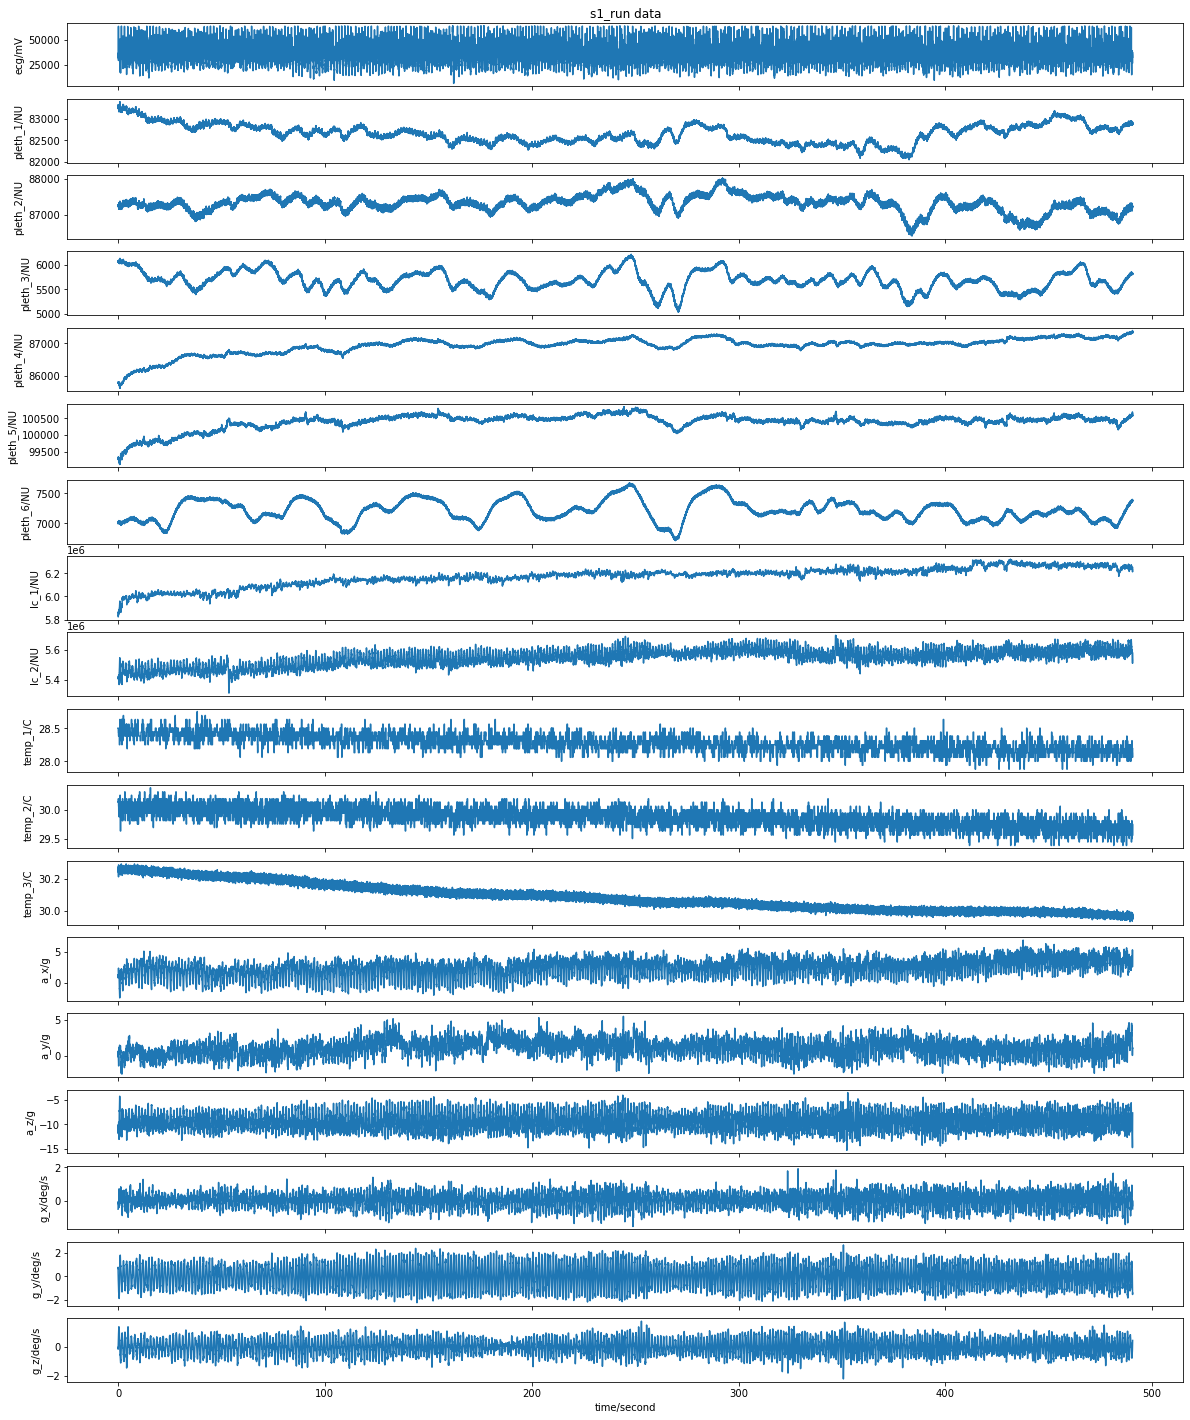

{'record_name': 's1_run',
 'n_sig': 18,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 245274,
 'base_time': None,
 'base_date': None,
 'comments': ['<filename>: s1_run <activity>: run <gender>: female <height>: 160 <weight>: 50 <age>: 25 <bp_sys_start>: 92 <bp_sys_end>: 94 <bp_dia_start>: 72 <bp_dia_end>: 76 <hr_1_start>: 65 <hr_2_start>: 69 <hr_1_end>: 78 <hr_2_end>: 71 <spo2_start>: 99 <spo2_end>: 98'],
 'sig_name': ['ecg',
  'pleth_1',
  'pleth_2',
  'pleth_3',
  'pleth_4',
  'pleth_5',
  'pleth_6',
  'lc_1',
  'lc_2',
  'temp_1',
  'temp_2',
  'temp_3',
  'a_x',
  'a_y',
  'a_z',
  'g_x',
  'g_y',
  'g_z'],
 'p_signal': array([[ 3.19911610e+04,  8.33238769e+04,  8.72616378e+04, ...,
         -5.08193770e-01,  6.66104893e-01, -7.69546665e-02],
        [ 3.20913122e+04,  8.33238769e+04,  8.72616378e+04, ...,
         -5.03111833e-01,  7.08035957e-01, -5.74724725e-02],
        [ 3.21485415e+04,  8.33238769e+04,  8.72769844e+04, ...,
         -4.93794947e-01,  7

In [21]:
# Plotting 's1_run' record
record_s1_run = wfdb.rdrecord(r'C:\Users\nitar\OneDrive - Virginia Tech\BMES 4015\Example ML Algorithms from Lit Reviews\PPG_data\s1_run',physical=True)
wfdb.plot_wfdb(record=record_s1_run,title='s1_run data', figsize= (20,25)) 
display(record_s1_run.__dict__)

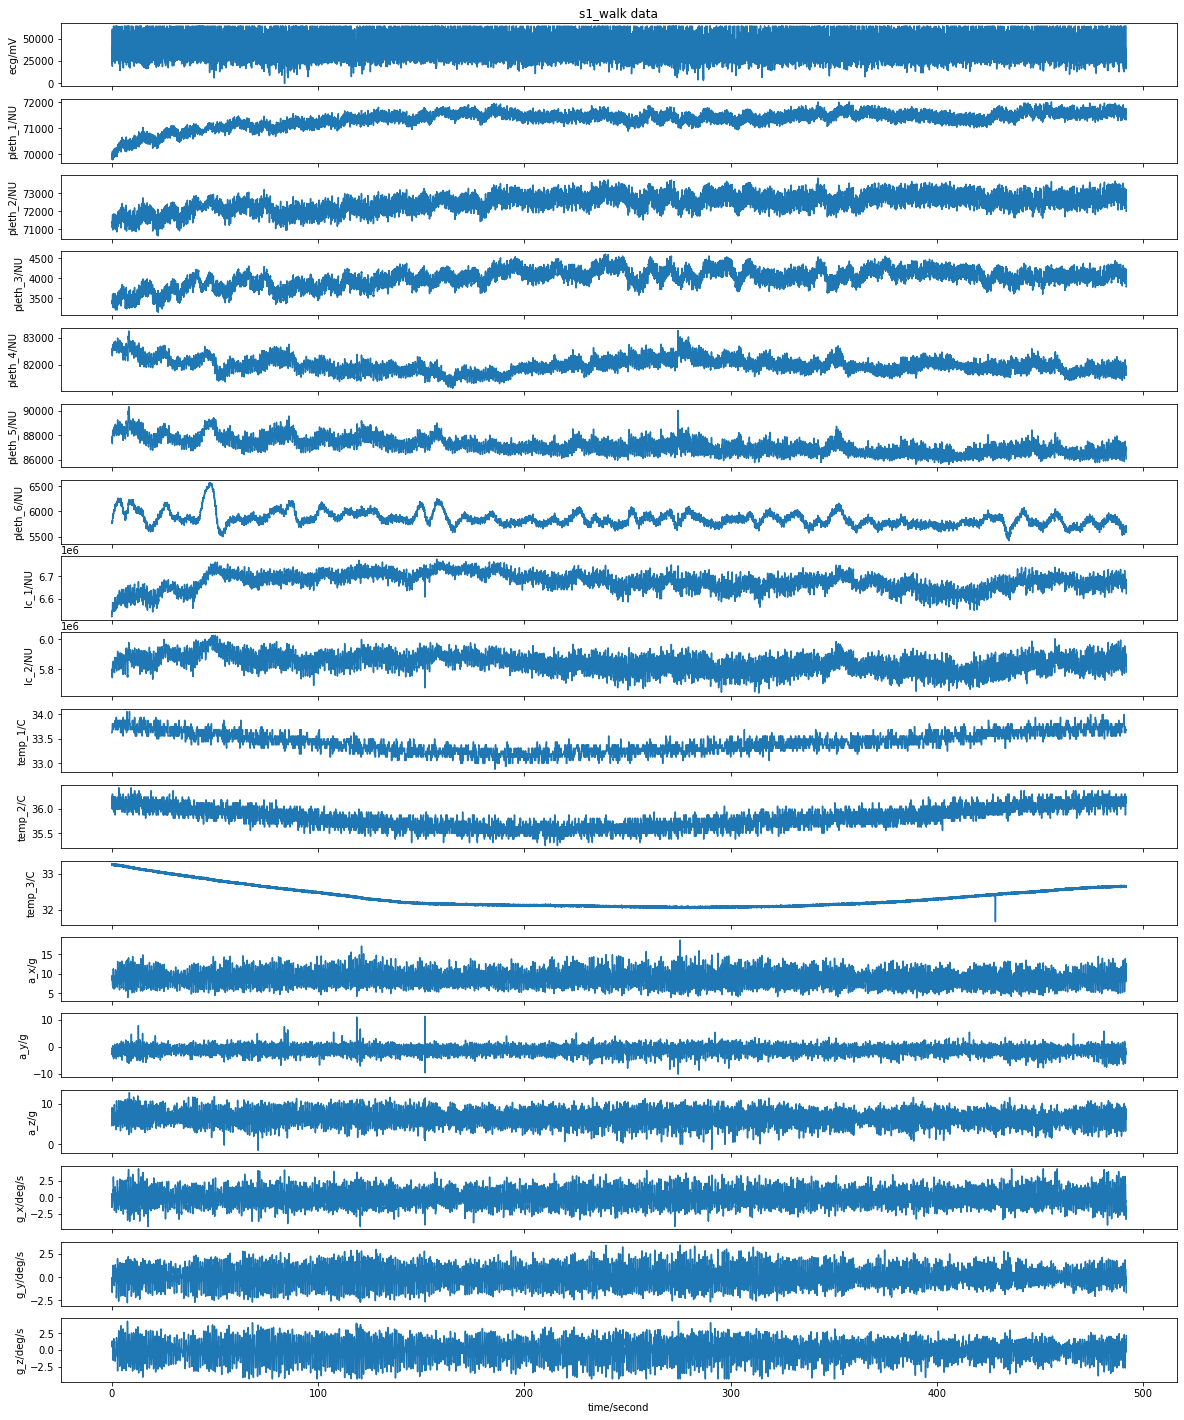

{'record_name': 's1_walk',
 'n_sig': 18,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 245902,
 'base_time': None,
 'base_date': None,
 'comments': ['<filename>: s1_walk <activity>: walk <gender>: female <height>: 160 <weight>: 50 <age>: 25 <bp_sys_start>: 94 <bp_sys_end>: 90 <bp_dia_start>: 67 <bp_dia_end>: 63 <hr_1_start>: 89 <hr_2_start>: 78 <hr_1_end>: 73 <hr_2_end>: 77 <spo2_start>: 96 <spo2_end>: 97'],
 'sig_name': ['ecg',
  'pleth_1',
  'pleth_2',
  'pleth_3',
  'pleth_4',
  'pleth_5',
  'pleth_6',
  'lc_1',
  'lc_2',
  'temp_1',
  'temp_2',
  'temp_3',
  'a_x',
  'a_y',
  'a_z',
  'g_x',
  'g_y',
  'g_z'],
 'p_signal': array([[ 3.72299756e+04,  6.98151268e+04,  7.11436871e+04, ...,
          5.45849843e-01, -8.18054479e-02,  5.22267505e-01],
        [ 3.74031383e+04,  6.98200226e+04,  7.11374438e+04, ...,
          5.15998679e-01, -7.87756165e-02,  5.45716250e-01],
        [ 3.76864954e+04,  6.98200226e+04,  7.11460284e+04, ...,
          4.81883064e-01,

In [18]:
# Plotting 's1_walk' record
record_s1_walk = wfdb.rdrecord(r'C:\Users\nitar\OneDrive - Virginia Tech\BMES 4015\Example ML Algorithms from Lit Reviews\PPG_data\s1_walk',physical=True)
wfdb.plot_wfdb(record=record_s1_walk,title='s1_walk data', figsize= (20,25)) 
display(record_s1_walk.__dict__)

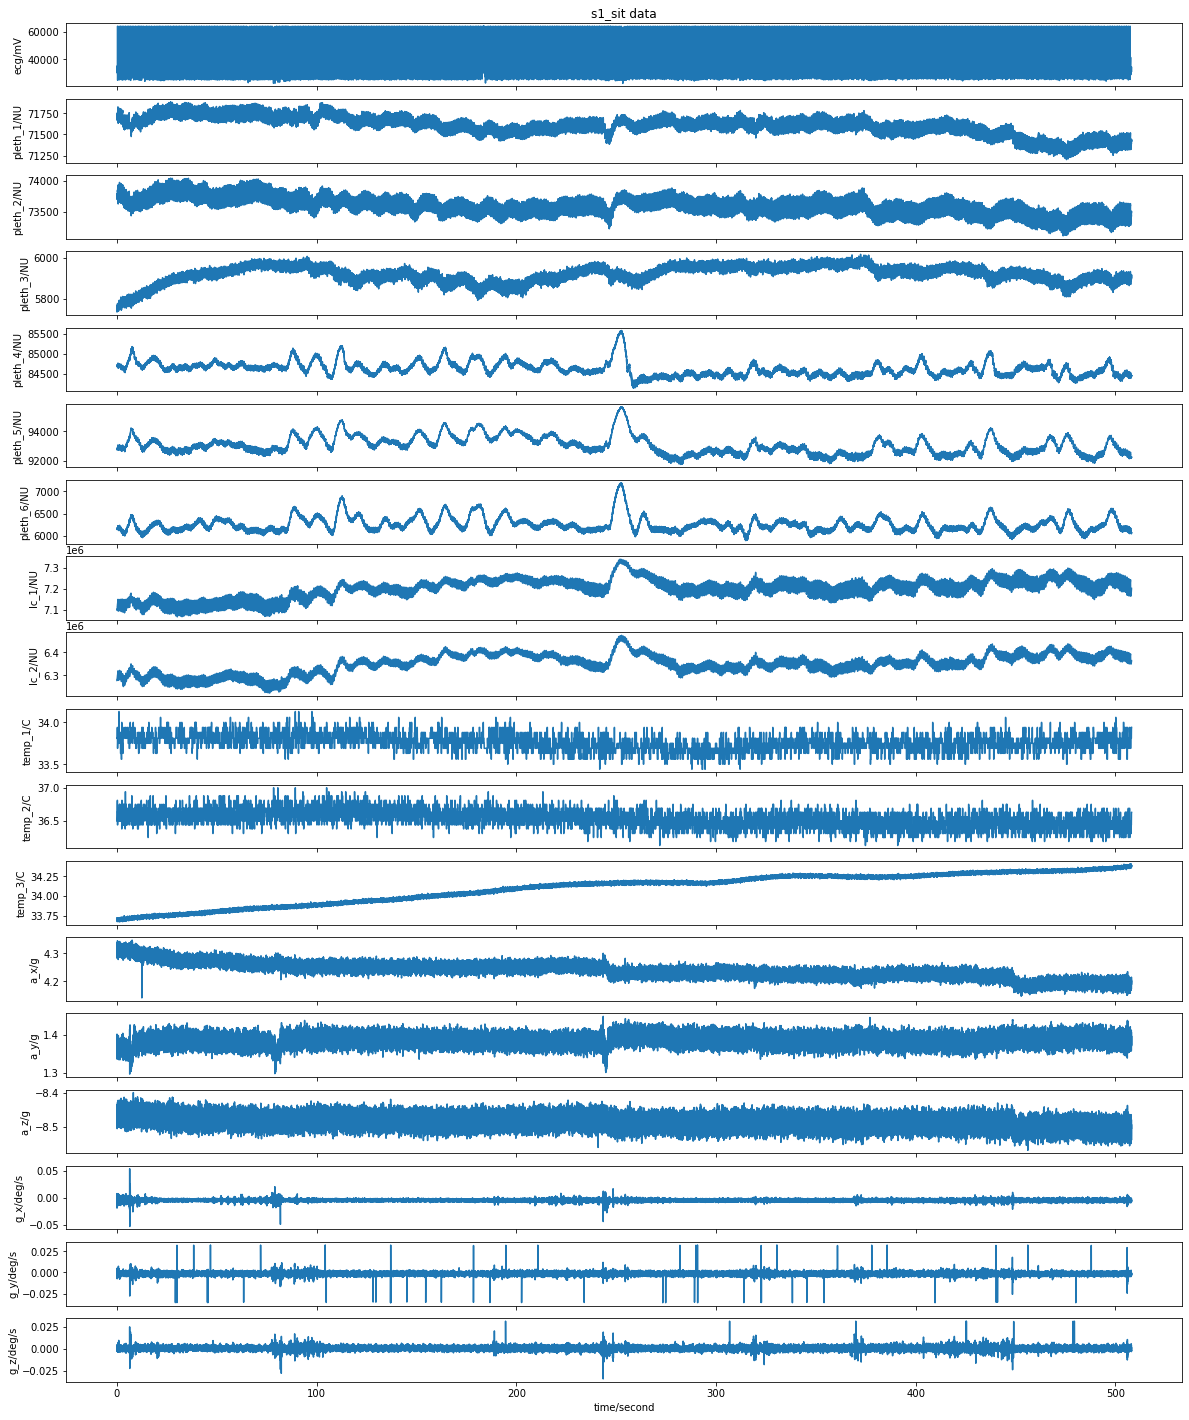

{'record_name': 's1_sit',
 'n_sig': 18,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 254026,
 'base_time': None,
 'base_date': None,
 'comments': ['<filename>: s1_sit <activity>: sit <gender>: female <height>: 160 <weight>: 50 <age>: 25 <bp_sys_start>: 87 <bp_sys_end>: 87 <bp_dia_start>: 59 <bp_dia_end>: 57 <hr_1_start>: 74 <hr_2_start>: 69 <hr_1_end>: 74 <hr_2_end>: 70 <spo2_start>: 98 <spo2_end>: 98'],
 'sig_name': ['ecg',
  'pleth_1',
  'pleth_2',
  'pleth_3',
  'pleth_4',
  'pleth_5',
  'pleth_6',
  'lc_1',
  'lc_2',
  'temp_1',
  'temp_2',
  'temp_3',
  'a_x',
  'a_y',
  'a_z',
  'g_x',
  'g_y',
  'g_z'],
 'p_signal': array([[ 3.07405002e+04,  7.16949830e+04,  7.37368418e+04, ...,
          7.73396744e-03, -4.82016791e-04,  4.57538728e-03],
        [ 3.07200475e+04,  7.16798682e+04,  7.37258545e+04, ...,
          6.81947805e-03,  1.24659515e-03,  4.31670814e-03],
        [ 3.07098211e+04,  7.16798682e+04,  7.37258545e+04, ...,
          6.14014307e-03,  1

In [20]:
# Plotting 's1_sut' record
record_s1_sit = wfdb.rdrecord(r'C:\Users\nitar\OneDrive - Virginia Tech\BMES 4015\Example ML Algorithms from Lit Reviews\PPG_data\s1_sit',physical=True)
wfdb.plot_wfdb(record=record_s1_sit,title='s1_sit data', figsize= (20,25)) 
display(record_s1_sit.__dict__)